In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list of tuples.
coordinates = list(lat_lngs)


In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-24.07146351991379 177.90946728386103
-16.33783704963264 -3.211277623980351
30.551439436181212 -171.4057770740879
36.26076074063663 -70.81768346271797
28.992978495246817 -123.17112658453382
-69.26633856940161 95.55804691351449
64.64569621673922 -166.30321316027886
-87.83403792369282 102.54941613321142
-2.0119368325483578 -142.50805901184836
-74.60804279285071 171.9479160760456
-14.509833741787574 -107.64041728529685
-74.96525676981847 80.81941932702762
19.521941604601864 -44.3489269395927
32.429178491355714 -7.522405699324281
83.98525893927393 125.83196564327693
-67.21594670985957 88.01132847989271
-70.52959728447806 53.84720519555998
40.29415257697676 95.7438206888624
-27.530644993361342 85.70290210207838
79.55705866198653 5.866205178121163
67.69793315504725 -15.98879536674201
65.57995011338272 157.52487688049928
-19.220074179037255 -24.89454334121197
47.64783510439602 159.0401409534939
-78.58385117241859 -141.94883689485388
-79.11620666100544 133.78173511239925
75.01087863798764 132.

-88.58042631206189 52.93905350815581
-54.26638089438521 -31.800193833178156
54.17167443856815 -92.86740815307954
-52.91283643910617 -62.38973169154848
-56.38438844972073 160.79093318623268
86.69565473227715 78.37290440626015
72.24257354324925 -137.69703781780515
-7.958755123252558 -136.03988428229243
-48.08059246132169 124.64565359863701
37.42330325127148 140.02626699441208
-10.532136059579855 -14.254959087098229
-79.02172854255583 -42.85910242011158
55.67060702251274 -35.11464193299375
59.89614070981702 -87.4930509674539
34.287919656838824 89.38668932056862
53.64913455155943 -131.10224618570655
36.32959181322583 165.1414599311429
38.69319418974953 -38.24124549618995
62.35152728219242 162.26628729852052
0.9990318803370428 147.71751705040737
-6.283869003008249 122.0376818658176
-89.73579082183566 -172.4299914091453
10.375573937720134 -127.07990674118848
16.366068770321846 -58.68496783119231
-62.29155434041408 58.58231818687301
18.072524679819182 115.62405433516943
84.46023103154965 29.5

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isangel
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | brigantine
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | nome
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | bathsheba
Processing Record 13 of Set 1 | marrakesh
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | yumen
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | husavik
Processing Record 20 of Set 1 | omsukchan
Processing Record 21 of Set 1 | belmonte
Processing Record 22 of Set 1 | severo-kurilsk
Processing Record 2

Processing Record 41 of Set 4 | mahajanga
Processing Record 42 of Set 4 | thompson
Processing Record 43 of Set 4 | sijunjung
Processing Record 44 of Set 4 | rodrigues alves
Processing Record 45 of Set 4 | kodinsk
Processing Record 46 of Set 4 | palmer
Processing Record 47 of Set 4 | vilhena
Processing Record 48 of Set 4 | macapa
Processing Record 49 of Set 4 | san cristobal
Processing Record 50 of Set 4 | college
Processing Record 1 of Set 5 | arraial do cabo
Processing Record 2 of Set 5 | bilma
Processing Record 3 of Set 5 | shirokiy
Processing Record 4 of Set 5 | kavaratti
Processing Record 5 of Set 5 | narsaq
Processing Record 6 of Set 5 | kamaishi
Processing Record 7 of Set 5 | necochea
Processing Record 8 of Set 5 | aporawan
City not found. Skipping...
Processing Record 9 of Set 5 | corn island
Processing Record 10 of Set 5 | povoa de varzim
Processing Record 11 of Set 5 | tautira
Processing Record 12 of Set 5 | nikolskoye
Processing Record 13 of Set 5 | algeciras
Processing Recor

Processing Record 35 of Set 8 | santa cruz
Processing Record 36 of Set 8 | walvis bay
Processing Record 37 of Set 8 | xining
Processing Record 38 of Set 8 | sao joao da ponte
Processing Record 39 of Set 8 | chalus
Processing Record 40 of Set 8 | show low
Processing Record 41 of Set 8 | udomlya
Processing Record 42 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 43 of Set 8 | pisco
Processing Record 44 of Set 8 | broome
Processing Record 45 of Set 8 | esso
Processing Record 46 of Set 8 | boa vista
Processing Record 47 of Set 8 | nema
Processing Record 48 of Set 8 | teguise
Processing Record 49 of Set 8 | zhigansk
Processing Record 50 of Set 8 | marcona
City not found. Skipping...
Processing Record 1 of Set 9 | hun
Processing Record 2 of Set 9 | moose jaw
Processing Record 3 of Set 9 | ilebo
Processing Record 4 of Set 9 | rio gallegos
Processing Record 5 of Set 9 | udachnyy
Processing Record 6 of Set 9 | bonthe
Processing Record 7 of Set 9 | namatanai
Processing Record 

Processing Record 21 of Set 12 | aykhal
Processing Record 22 of Set 12 | darlowo
Processing Record 23 of Set 12 | caravelas
Processing Record 24 of Set 12 | hambantota
Processing Record 25 of Set 12 | rungata
City not found. Skipping...
Processing Record 26 of Set 12 | tarakan
Processing Record 27 of Set 12 | westport
Processing Record 28 of Set 12 | mandurah
Processing Record 29 of Set 12 | el alto
Processing Record 30 of Set 12 | maldonado
Processing Record 31 of Set 12 | monrovia
Processing Record 32 of Set 12 | sao felix do xingu
Processing Record 33 of Set 12 | harer
Processing Record 34 of Set 12 | lebedinyy
Processing Record 35 of Set 12 | deputatskiy
Processing Record 36 of Set 12 | chapais
Processing Record 37 of Set 12 | harper
Processing Record 38 of Set 12 | fatezh
Processing Record 39 of Set 12 | cartagena
Processing Record 40 of Set 12 | floro
Processing Record 41 of Set 12 | usinsk
Processing Record 42 of Set 12 | inderborskiy
City not found. Skipping...
Processing Recor

In [9]:
len(city_data)

573

In [10]:
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Isangel,-19.5500,169.2667,71.71,88,100,11.50,VU,2022-08-09 23:34:32
1,Jamestown,42.0970,-79.2353,71.19,60,20,6.91,US,2022-08-09 23:32:21
2,Kapaa,22.0752,-159.3190,84.18,72,40,16.11,US,2022-08-09 23:34:28
3,Brigantine,39.4101,-74.3646,93.40,59,0,11.50,US,2022-08-09 23:35:08
4,Lompoc,34.6391,-120.4579,85.01,61,0,16.11,US,2022-08-09 23:33:06
5,Busselton,-33.6500,115.3333,52.32,69,98,7.70,AU,2022-08-09 23:35:09
6,Nome,64.5011,-165.4064,55.17,71,0,12.66,US,2022-08-09 23:35:09
7,Albany,42.6001,-73.9662,79.21,65,33,8.16,US,2022-08-09 23:35:09
8,Atuona,-9.8000,-139.0333,77.20,71,5,19.04,PF,2022-08-09 23:35:10
9,Bluff,-46.6000,168.3333,42.80,67,46,4.79,NZ,2022-08-09 23:35:10


In [11]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp",
                  "Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Isangel,VU,2022-08-09 23:34:32,-19.5500,169.2667,71.71,88,100,11.50
1,Jamestown,US,2022-08-09 23:32:21,42.0970,-79.2353,71.19,60,20,6.91
2,Kapaa,US,2022-08-09 23:34:28,22.0752,-159.3190,84.18,72,40,16.11
3,Brigantine,US,2022-08-09 23:35:08,39.4101,-74.3646,93.40,59,0,11.50
4,Lompoc,US,2022-08-09 23:33:06,34.6391,-120.4579,85.01,61,0,16.11
5,Busselton,AU,2022-08-09 23:35:09,-33.6500,115.3333,52.32,69,98,7.70
6,Nome,US,2022-08-09 23:35:09,64.5011,-165.4064,55.17,71,0,12.66
7,Albany,US,2022-08-09 23:35:09,42.6001,-73.9662,79.21,65,33,8.16
8,Atuona,PF,2022-08-09 23:35:10,-9.8000,-139.0333,77.20,71,5,19.04
9,Bluff,NZ,2022-08-09 23:35:10,-46.6000,168.3333,42.80,67,46,4.79


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

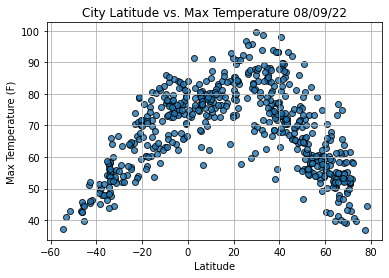

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

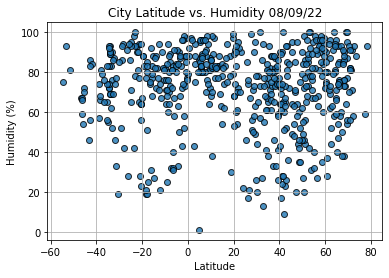

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

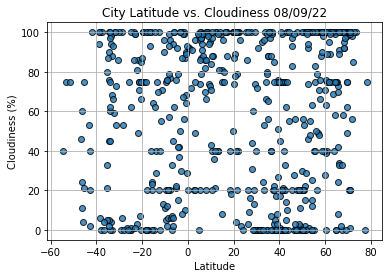

In [16]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

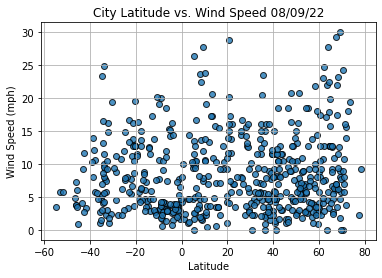

In [17]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13=city_data_df.loc[13]
index13

City                        Tiksi
Country                        RU
Date          2022-08-09 23:35:11
Lat                       71.6872
Lng                      128.8694
Max Temp                    58.53
Humidity                       71
Cloudiness                     56
Wind Speed                  15.55
Name: 13, dtype: object

In [21]:
city_data_df["Lat"]>=0

0      False
1       True
2       True
3       True
4       True
       ...  
568    False
569     True
570     True
571    False
572     True
Name: Lat, Length: 573, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Jamestown,US,2022-08-09 23:32:21,42.0970,-79.2353,71.19,60,20,6.91
2,Kapaa,US,2022-08-09 23:34:28,22.0752,-159.3190,84.18,72,40,16.11
3,Brigantine,US,2022-08-09 23:35:08,39.4101,-74.3646,93.40,59,0,11.50
4,Lompoc,US,2022-08-09 23:33:06,34.6391,-120.4579,85.01,61,0,16.11
6,Nome,US,2022-08-09 23:35:09,64.5011,-165.4064,55.17,71,0,12.66


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

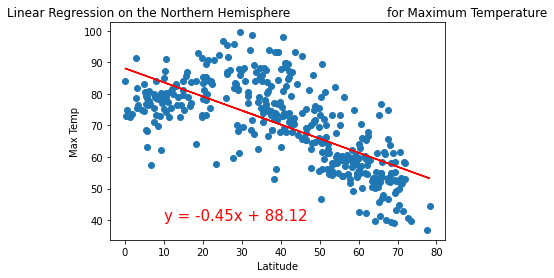

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

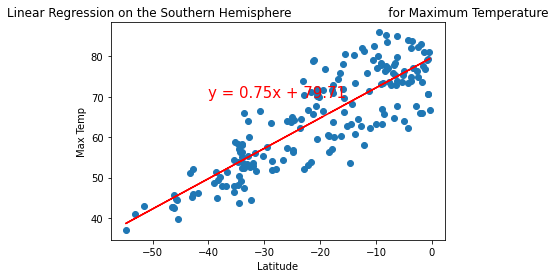

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-40,70))

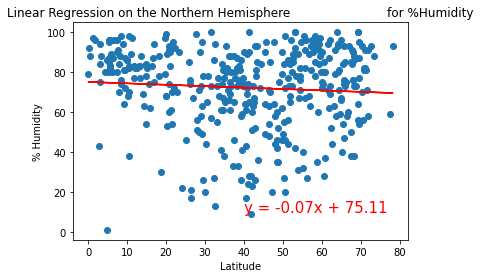

In [33]:
# Linear regression on the Northern Hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %Humidity', '% Humidity',(40,10))

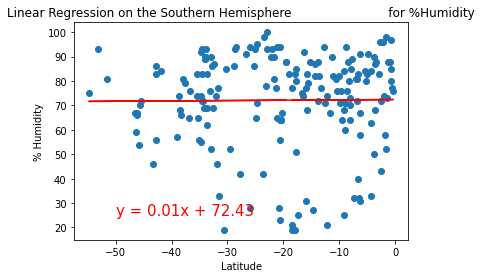

In [35]:
# Linear regression on the Southern Hemisphere for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for %Humidity', '% Humidity',(-50,25))

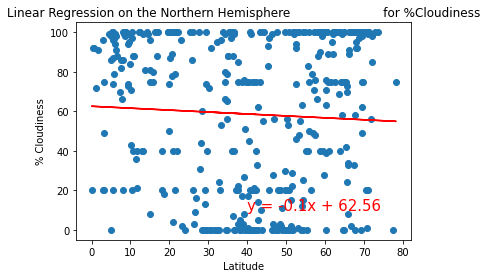

In [38]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for %Cloudiness', '% Cloudiness',(40,10))

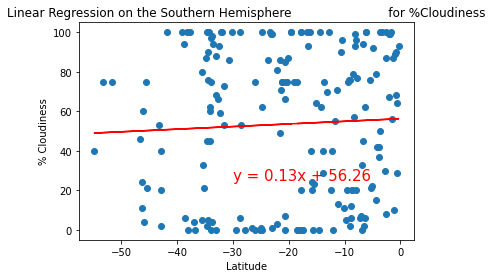

In [39]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for %Cloudiness', '% Cloudiness',(-30,25))

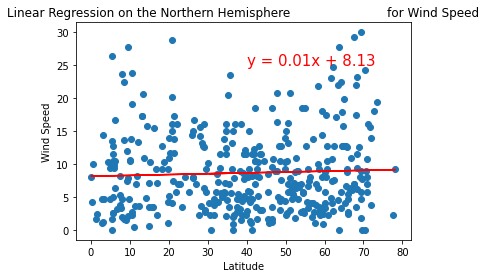

In [41]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

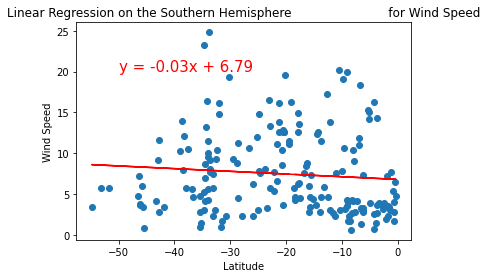

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))